In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
df_train = pd.read_csv('data/train.csv',header=None)
df_test = pd.read_csv('data/test.csv',header=None)

In [4]:
#df_train.info()

In [5]:
#df_test.info()

In [6]:
X_train=df_train.drop([0],axis=1).values
y_train=df_train[0].values

In [7]:
X_test=df_test.drop([0],axis=1).values
y_test=df_test[0].values

Text(0, 0.5, 'Number of songs')

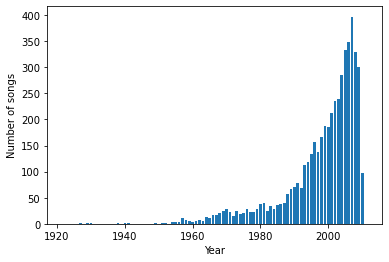

In [8]:
year_distribution = dict()
yrs = range(1922,2012)
for yr in yrs:
    year_distribution[yr]=len(df_train.loc[df_train[0]==yr])
values = [year_distribution[yr] for yr in yrs]
plt.bar(yrs, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")

In [9]:
mms = MinMaxScaler()
X_train_regular = mms.fit_transform(X_train)
X_test_regular = mms.fit_transform(X_test)

In [10]:
pca = PCA(.90)

In [11]:
pca.fit(X_train_regular)

PCA(n_components=0.9)

In [12]:
pca.n_components_

45

In [13]:
X_train_PCA = pca.transform(X_train_regular)
X_test_PCA = pca.transform(X_test_regular)
y_train_proc = y_train - 1922
y_test_proc = y_test - 1922

In [14]:
def range_accuracy(y_real,y_pred,n):
    return sum(np.absolute(y_real-y_pred)<=n)/y_real.shape[0]

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logistic_reg = LogisticRegression(penalty='none', solver='saga',max_iter=5000)
logistic_reg.fit(X_train_PCA, y_train_proc)

LogisticRegression(max_iter=5000, penalty='none', solver='saga')

In [17]:
y_pred=logistic_reg .predict(X_test_PCA)

#### accuracy

In [18]:
accuracy_score(y_test_proc, y_pred)

0.026

#### accuracy in range 10

In [19]:
range_accuracy(y_test_proc,y_pred,10)

0.256

#### average absolute difference

In [20]:
np.mean(np.absolute((y_pred-y_test_proc)))

29.066

#### square root of the average squared difference

In [21]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

33.87733755772434

#### precision

In [22]:
precision_score(y_test_proc,y_pred,average='macro')

0.04417905798547496

#### recall

In [23]:
recall_score(y_test_proc,y_pred,average='macro')

0.022135154444033443

#### macro f1 score

In [24]:
f1_score(y_test_proc,y_pred,average='macro')

0.008319148508372691

#### micro f1 score

In [25]:
f1_score(y_test_proc,y_pred,average='micro')

0.026

### SVM - linear

In [26]:
from sklearn.svm import SVC

In [27]:
#linear kernel
mySVM = SVC(kernel='linear', C=0.5)

In [28]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, kernel='linear')

In [29]:
y_pred = mySVM.predict(X_test_PCA)

#### accuracy

In [30]:
accuracy_score(y_test_proc, y_pred)

0.075

#### accuracy in range 10

In [31]:
range_accuracy(y_test_proc,y_pred,10)

0.713

#### average absolute difference

In [32]:
np.mean(np.absolute((y_pred-y_test_proc)))

9.021

#### square root of the average squared difference

In [33]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

14.246999684144027

#### precision

In [34]:
precision_score(y_test_proc,y_pred,average='macro')

0.0027683159594773165

#### recall

In [35]:
recall_score(y_test_proc,y_pred,average='macro')

0.017677465723131357

#### macro f1 score

In [36]:
f1_score(y_test_proc,y_pred,average='macro')

0.0032534093621457935

#### micro f1 score

In [37]:
f1_score(y_test_proc,y_pred,average='micro')

0.075

### SVM - polynomial

In [38]:
# polynomial
mySVM = SVC(kernel='poly', C=0.5, gamma=1.0, coef0=1, degree=2)

In [39]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, coef0=1, degree=2, gamma=1.0, kernel='poly')

In [40]:
y_pred=mySVM.predict(X_test_PCA)

#### accuracy

In [41]:
accuracy_score(y_test_proc, y_pred)

0.073

#### accuracy in range 10

In [42]:
range_accuracy(y_test_proc,y_pred,10)

0.726

#### average absolute difference

In [43]:
np.mean(np.absolute((y_pred-y_test_proc)))

8.903

#### square root of the average squared difference

In [44]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

13.982953908241276

#### precision

In [45]:
precision_score(y_test_proc,y_pred,average='macro')

0.00817261050761768

#### recall

In [46]:
recall_score(y_test_proc,y_pred,average='macro')

0.01823168839199296

#### macro f1 score

In [47]:
f1_score(y_test_proc,y_pred,average='macro')

0.007744620596098604

#### micro f1 score

In [48]:
f1_score(y_test_proc,y_pred,average='micro')

0.073

### SVM - RBF

In [49]:
# rbf kernel
mySVM = SVC(kernel='rbf', C=0.5, gamma=1.0)

In [50]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, gamma=1.0)

In [51]:
y_pred = mySVM.predict(X_test_PCA)

#### accuracy

In [52]:
accuracy_score(y_test_proc, y_pred)

0.076

#### accuracy in range 10

In [53]:
range_accuracy(y_test_proc,y_pred,10)

0.712

#### average absolute difference

In [54]:
np.mean(np.absolute((y_pred-y_test_proc)))

9.032

#### square root of the average squared difference

In [55]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

14.256016273840318

#### precision

In [56]:
precision_score(y_test_proc,y_pred,average='macro')

0.0013571428571428571

#### recall

In [57]:
recall_score(y_test_proc,y_pred,average='macro')

0.017857142857142856

#### macro f1 score

In [58]:
f1_score(y_test_proc,y_pred,average='macro')

0.002522570366436537

#### micro f1 score

In [59]:
f1_score(y_test_proc,y_pred,average='micro')

0.076

### SVM - sigmoid

In [60]:
# sigmoid kernel
mySVM = SVC(kernel='sigmoid', C=0.5, gamma=1.0, coef0=1)

In [61]:
mySVM.fit(X_train_PCA, y_train_proc)

SVC(C=0.5, coef0=1, gamma=1.0, kernel='sigmoid')

In [62]:
y_pred = mySVM.predict(X_test_PCA)

#### accuracy

In [63]:
accuracy_score(y_test_proc, y_pred)

0.074

#### accuracy in range 10

In [64]:
range_accuracy(y_test_proc,y_pred,10)

0.709

#### average absolute difference

In [65]:
np.mean(np.absolute((y_pred-y_test_proc)))

9.035

#### square root of the average squared difference

In [66]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

14.227754566339694

#### precision

In [67]:
precision_score(y_test_proc,y_pred,average='macro')

0.01921361676824736

#### recall

In [68]:
recall_score(y_test_proc,y_pred,average='macro')

0.017813631300473403

#### macro f1 score

In [69]:
f1_score(y_test_proc,y_pred,average='macro')

0.0037896306063408968

#### micro f1 score

In [70]:
f1_score(y_test_proc,y_pred,average='micro')

0.074

### kNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
neighbors_list=list(range(1,200))
accuracy_dict=dict()
accuracy_range_dict=dict()
abs_diff_dict=dict()
sqr_diff_dict=dict()
precision_dict=dict()
recall_dict=dict()
f1_macro_dict=dict()
f1_micro_dict=dict()
for n_neighbors in neighbors_list:
    mykNN = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm='auto')
    mykNN.fit(X_train_PCA,y_train_proc)
    y_pred=mykNN.predict(X_test_PCA)
    accuracy_dict[n_neighbors]=accuracy_score(y_test_proc, y_pred)
    accuracy_range_dict[n_neighbors] = range_accuracy(y_test_proc,y_pred,10)
    abs_diff_dict[n_neighbors]=np.mean(np.absolute((y_pred-y_test_proc)))
    sqr_diff_dict[n_neighbors]=np.sqrt(np.mean(np.square((y_pred-y_test_proc))))
    precision_dict[n_neighbors]=precision_score(y_test_proc,y_pred,average='macro')
    recall_dict[n_neighbors]=recall_score(y_test_proc,y_pred,average='macro')
    f1_macro_dict[n_neighbors]=f1_score(y_test_proc,y_pred,average='macro')
    f1_micro_dict[n_neighbors]=f1_score(y_test_proc,y_pred,average='micro')

#### most accurate k

In [73]:
max(accuracy_dict,key=accuracy_dict.get)

168

In [74]:
accuracy_dict[141]

0.074

In [75]:
accuracy_range_dict[141]

0.75

#### most accurate k in 10 years

In [76]:
max(accuracy_range_dict,key=accuracy_range_dict.get)

35

In [77]:
accuracy_dict[58]

0.068

In [78]:
accuracy_range_dict[58]

0.756

In [79]:
abs_diff_dict[58]

8.18

In [80]:
sqr_diff_dict[58]

13.077002714689632

In [81]:
precision_dict[58]

0.011473602503977826

In [82]:
recall_dict[58]

0.018484823377456352

In [83]:
f1_macro_dict[58]

0.01207183889558742

In [84]:
f1_micro_dict[58]

0.068

Text(0.5, 1.0, 'Accuracy of k Neighbors')

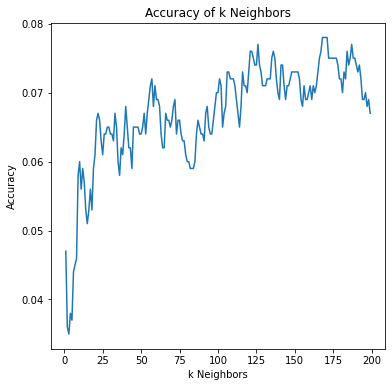

In [85]:
plt.figure(figsize=(6,6))
plt.plot(range(1,200),accuracy_dict.values())
plt.xlabel('k Neighbors')
plt.ylabel('Accuracy')
plt.title("Accuracy of k Neighbors")

Text(0.5, 1.0, 'Range Accuracy of k Neighbors')

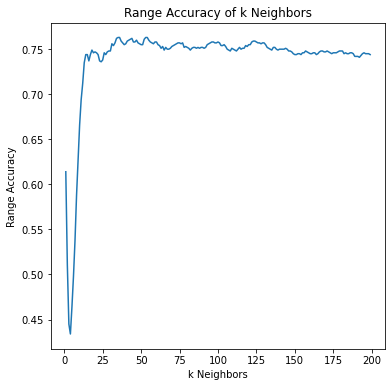

In [86]:
plt.figure(figsize=(6,6))
plt.plot(range(1,200),accuracy_range_dict.values())
plt.xlabel('k Neighbors')
plt.ylabel('Range Accuracy')
plt.title("Range Accuracy of k Neighbors")

### Random Forest

In [87]:
my_n_estimators = [50, 100, 200, 300]
my_oob_scores = []
from sklearn.ensemble import RandomForestClassifier
for n_estimators in my_n_estimators:
    myRF = RandomForestClassifier(n_estimators=n_estimators, 
                                  max_features=None,  random_state=123, 
                                  oob_score=True,
                                 n_jobs=1)
    myRF.fit(X_train_PCA, y_train_proc)
    my_oob_scores.append([n_estimators, myRF.oob_score_])

In [88]:
n_estimatores_best = my_oob_scores.index(max(my_oob_scores,key=lambda item:item[1]))

In [89]:
my_oob_scores

[[50, 0.0598], [100, 0.0716], [200, 0.072], [300, 0.0718]]

In [90]:
my_max_features=range(1,X_train_PCA.shape[1]+1)

In [91]:
my_oob_scores = []
for max_features in my_max_features:
    myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                                  max_features=max_features,  
                                  random_state=123, oob_score=True)
    myRF.fit(X_train_PCA, y_train_proc)
    my_oob_scores.append([max_features, myRF.oob_score_])

In [92]:
max_features_best=my_oob_scores.index(max(my_oob_scores,key=lambda item:item[1]))

In [93]:
max_features_best

12

In [94]:
myRF = RandomForestClassifier(n_estimators=n_estimatores_best,
                              max_features=max_features_best,  
                              random_state=123, oob_score=True)

In [95]:
myRF.fit(X_train_PCA, y_train_proc)

RandomForestClassifier(max_features=12, n_estimators=2, oob_score=True,
                       random_state=123)

In [96]:
y_pred=myRF.predict(X_test_PCA)

#### accuracy

In [97]:
accuracy_score(y_test_proc, y_pred)

0.043

#### accuracy in range 10

In [98]:
range_accuracy(y_test_proc,y_pred,10)

0.632

#### average absolute difference

In [99]:
np.mean(np.absolute((y_pred-y_test_proc)))

10.413

#### square root of the average squared difference

In [100]:
np.mean(np.square((y_pred-y_test_proc)))

219.819

#### precision

In [101]:
precision_score(y_test_proc,y_pred,average='macro')

0.012877139060110511

#### recall

In [102]:
recall_score(y_test_proc,y_pred,average='macro')

0.01677883774492515

#### macro f1 score

In [103]:
f1_score(y_test_proc,y_pred,average='macro')

0.01045271297683598

#### micro f1 score

In [104]:
f1_score(y_test_proc,y_pred,average='micro')

0.043

### Linear Regression

In [105]:
from sklearn.linear_model import LinearRegression

In [106]:
linear_reg = LinearRegression()

In [107]:
linear_reg.fit(X_train_PCA, y_train_proc)

LinearRegression()

In [108]:
y_pred = linear_reg.predict(X_test_PCA)

#### accuracy in range 10

In [109]:
range_accuracy(y_test_proc,y_pred,10)

0.76

#### average absolute difference

In [110]:
np.mean(np.absolute((y_pred-y_test_proc)))

7.424790009614781

#### square root of the average squared difference

In [111]:
np.sqrt(np.mean(np.square((y_pred-y_test_proc))))

10.539248038777693

#### linear regression prediction score

In [112]:
linear_reg.score(X_test_PCA,y_test_proc)

0.1515493690756703

Text(0.5, 1.0, 'Plot predicted and real values of Linear Regression')

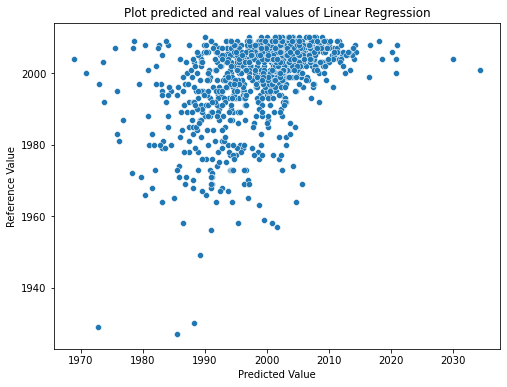

In [113]:
y_pred_temp=y_pred+1922
y_test_temp=y_test_proc+1922
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_temp, y=y_test_temp)
plt.xlabel('Predicted Value')
plt.ylabel('Reference Value')
plt.title("Plot predicted and real values of Linear Regression")